This notebook continues from the matrix factorisation algorithm analysis. Continue from
analysis on ml-100k, here the larger 1m dataset is used to generate accuracy and time scores. As well as top n prediction lists for each algorithm

In [24]:
import pandas as pd
import numpy as np
import random
from surprise import Dataset, SVDpp, SVD, NMF
from surprise.accuracy import rmse
import time
from surprise.model_selection import train_test_split

In [5]:
svd_setup= pd.read_csv('./gridSearch/SVD_rmse_best.csv')
svd_n_factors=svd_setup['n_factors'][0]
svd_lr_all= svd_setup['lr_all'][0]
svd_reg_all= svd_setup['reg_all'][0]
svd_n_epochs=svd_setup['n_epochs'][0]

In [6]:
data= Dataset.load_builtin('ml-1m')
trainset, testset = train_test_split(data, test_size=0.25)

In [16]:
algo= SVD(n_factors=svd_n_factors, lr_all=svd_lr_all, reg_all=svd_reg_all, n_epochs=svd_n_epochs, random_state=1)
start_fit = time.time()
algo.fit(trainset)
svd_fit_1m= time.time()-start_fit
start_predict= time.time()
predictions_svd = algo.test(testset)
svd_test_1m= time.time()-start_predict
print("Unbiased accuracy on 100k=,", end=" ")
svd_rmse_1m= rmse(predictions_svd)
print("Fit time for 100k = "+ str(svd_fit_1m))
print("Test time for 100k ="+ str(svd_test_1m))

svd_1m_stats=np.array([svd_rmse_1m, svd_fit_1m, svd_test_1m])

Unbiased accuracy on 100k=, RMSE: 0.8670
Fit time for 100k = 37.873523235321045
Test time for 100k =1.9679973125457764


In [9]:
#load the setup for SVDpp
svdpp_setup= pd.read_csv('./gridSearch/SVDpp_rmse_best.csv')

svdpp_n_factors=svd_setup['n_factors'][0]
svdpp_lr_all= svd_setup['lr_all'][0]
svdpp_reg_all= svd_setup['reg_all'][0]
svdpp_n_epochs=svd_setup['n_epochs'][0]

In [12]:
algo= SVDpp(n_factors=svdpp_n_factors, lr_all=svdpp_lr_all, reg_all=svdpp_reg_all, n_epochs=svdpp_n_epochs, random_state=1)
start_fit = time.time()
algo.fit(trainset)
svdpp_fit_1m= time.time()-start_fit
start_predict= time.time()
predictions_svdpp = algo.test(testset)
svdpp_test_1m= time.time()-start_predict
print("Unbiased accuracy on 1m=,", end=" ")
svdpp_rmse_1m= rmse(predictions_svdpp)
print("Fit time for 1m = "+ str(svdpp_fit_1m))
print("Test time for 1m ="+ str(svdpp_test_1m))


Unbiased accuracy on 100k=, RMSE: 0.8647
Fit time for 100k = 8567.871858596802
Test time for 100k =88.82908272743225


In [18]:
svdpp_1m_stats=np.array([svdpp_rmse_1m, svdpp_fit_1m, svdpp_test_1m])
svdpp_1m_stats

array([8.64653324e-01, 8.56787186e+03, 8.88290827e+01])

In [20]:
nmf_setup= pd.read_csv('./gridSearch/nmf_rmse_best.csv')
nmf_n_factors =nmf_setup['n_factors'].iloc[0]
nmf_lr_bu =nmf_setup['lr_bu'].iloc[0]
nmf_lr_bi =nmf_setup['lr_bi'].iloc[0]
nmf_reg_bu =nmf_setup['reg_bu'].iloc[0]
nmf_reg_bi =nmf_setup['reg_bi'].iloc[0]
nmf_n_epochs =nmf_setup['n_epochs'].iloc[0]
nmf_biased =nmf_setup['biased'].iloc[0]

In [22]:
algo= NMF(n_factors=nmf_n_factors,
                     lr_bu=nmf_lr_bu,
                     lr_bi=nmf_lr_bi,
                     reg_bu=nmf_reg_bu,
                     reg_bi=nmf_reg_bi,
                     n_epochs=nmf_n_epochs,
                     biased=nmf_biased, random_state=1)


start_fit = time.time()
algo.fit(trainset)
nmfb_fit_1m= time.time()-start_fit
start_predict= time.time()
predictions_nmfb = algo.test(testset)
nmfb_test_1m= time.time()-start_predict
print("Unbiased accuracy on 1m=,", end=" ")
nmfb_rmse_1m= rmse(predictions_nmfb)
print("Fit time for 1m = "+ str(nmfb_fit_1m))
print("Test time for 1m ="+ str(nmfb_test_1m))

nmfb_1m_stats=np.array([nmfb_rmse_1m, nmfb_fit_1m, nmfb_test_1m])

Unbiased accuracy on 100k=, RMSE: 0.9830
Fit time for 100k = 20.722030639648438
Test time for 100k =1.6379411220550537


In [23]:
algo= NMF(n_factors=nmf_n_factors,
                     lr_bu=nmf_lr_bu,
                     lr_bi=nmf_lr_bi,
                     reg_bu=nmf_reg_bu,
                     reg_bi=nmf_reg_bi,
                     n_epochs=nmf_n_epochs,
                     biased=False, random_state=1)


start_fit = time.time()
algo.fit(trainset)
nmf_fit_1m= time.time()-start_fit
start_predict= time.time()
predictions_nmf = algo.test(testset)
nmf_test_1m= time.time()-start_predict
print("Unbiased accuracy on 1m=,", end=" ")
nmf_rmse_1m= rmse(predictions_nmf)
print("Fit time for 1m = "+ str(nmf_fit_1m))
print("Test time for 1m ="+ str(nmf_test_1m))

nmf_1m_stats=np.array([nmf_rmse_1m, nmf_fit_1m, nmf_test_1m])

Unbiased accuracy on 100k=, RMSE: 0.9101
Fit time for 100k = 20.374171257019043
Test time for 100k =1.5939979553222656


In [26]:
data=pd.DataFrame(columns=['RMSE', 'Fit Time', 'Predict Time'])
data.loc[len(data)] = svd_1m_stats
data.loc[len(data)] = svdpp_1m_stats
data.loc[len(data)] = nmfb_1m_stats
data.loc[len(data)] = nmf_1m_stats
data.insert(0,'Algorithm', ['SVD', 'SVDpp', 'NMF(bias)', 'NMF(unbias)'])
data.to_csv('./algo_data/matrix_factor_1m', index=False)

In [27]:
rmse_values=np.array([svd_1m_stats[0], svdpp_1m_stats[0], nmf_1m_stats[0], nmfb_1m_stats[0]])
fit_times=np.array([svd_1m_stats[1], svdpp_1m_stats[1], nmf_1m_stats[1], nmfb_1m_stats[1]])
algos=np.array(['SVD', 'SVD++', 'NMF(unbiased)', 'NMF(biased)'])

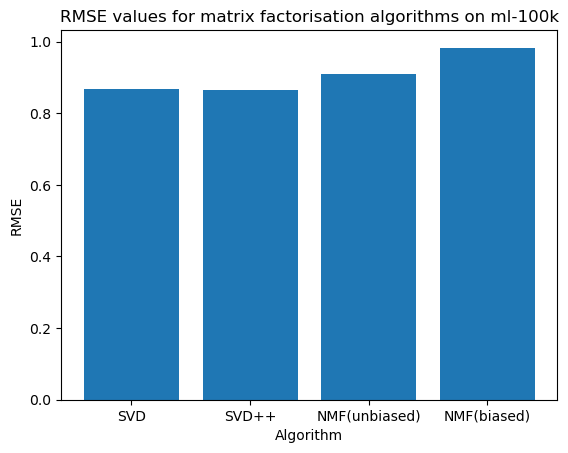

In [28]:
import matplotlib.pyplot as plt
x_labels = ['SVD', 'SVD++', 'NMF(unbiased)', 'NMF(bias)']

# Create the bar chart
plt.bar(range(len(rmse_values)), rmse_values)

# Set the x-axis tick locations and labels
plt.xticks(range(len(algos)), algos)

# Set the title and labels for the chart
plt.title('RMSE values for matrix factorisation algorithms on ml-100k')
plt.xlabel('Algorithm')
plt.ylabel('RMSE')

# Display the chart
plt.savefig('./Matrix Graphs/rmse_1m.png')
plt.show()

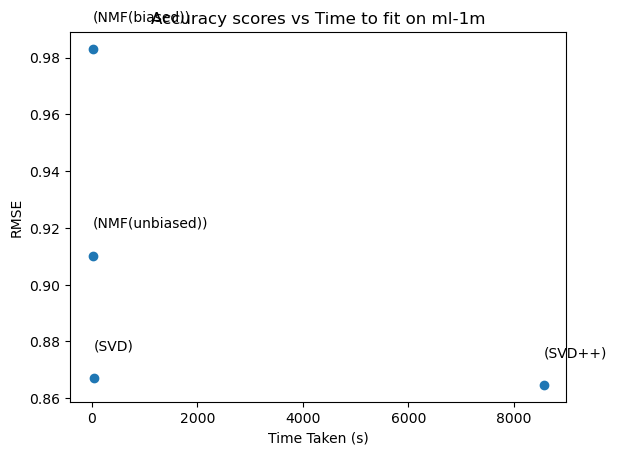

In [32]:

# Create the scatter plot
plt.scatter(fit_times, rmse_values)

# Add labels to each point
for i in range(len(fit_times)):
    plt.text(fit_times[i]+1, rmse_values[i]+0.01, f"({algos[i]})")

# Set the title and labels for the chart
plt.title('Accuracy scores vs Time to fit on ml-1m')
plt.xlabel('Time Taken (s)')
plt.ylabel('RMSE')


# Display the chart
plt.savefig('./Matrix Graphs/Accuracy vs time to fit on ml1m')
plt.show()

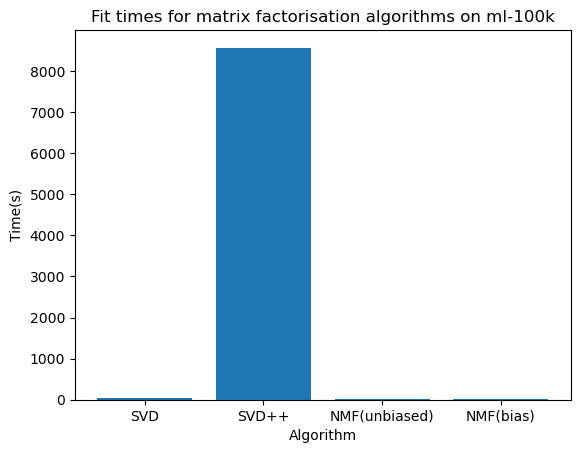

In [34]:
# Create the bar chart
plt.bar(range(len(fit_times)), fit_times)

# Set the x-axis tick locations and labels
plt.xticks(range(len(x_labels)), x_labels)

# Set the title and labels for the chart
plt.title('Fit times for matrix factorisation algorithms on ml-100k')
plt.xlabel('Algorithm')
plt.ylabel('Time(s)')

# Display the chart
plt.savefig('./Matrix Graphs/fit_1m.png')
plt.show()